<a href="https://colab.research.google.com/github/sarveshdabhade/MLDL-EXP-SSD/blob/main/mldl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform a comparative analysis of Multiple Linear Regression, Ridge Regression, and Lasso Regression using the California Housing dataset from `sklearn.datasets`. The task involves loading the data, performing hyperparameter tuning for the regularization models, comparing performance metrics like Mean Squared Error and R-squared, and visualizing the impact of regularization on model coefficients.

## Load and Prepare Dataset

### Subtask:
Load the California Housing dataset, explore its structure, and split the data into training and testing sets.


**Reasoning**:
Load the California Housing dataset using sklearn, convert it to a pandas DataFrame, and perform an initial check for missing values and data structure.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
housing = fetch_california_housing()

# 2. Create a pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# 3. Display first few rows and check for missing values
print('First 5 rows of the dataset:')
display(df.head())
print('\nMissing values in each column:')
print(df.isnull().sum())

# 4. Split the data into training and testing sets (80/20 split)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'\nTraining set shape: {X_train_scaled.shape}')
print(f'Testing set shape: {X_test_scaled.shape}')

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


## Implement Multiple Linear Regression

### Subtask:
Train a standard Multiple Linear Regression model and evaluate its performance on the testing set.


**Reasoning**:
I will import the necessary regression and evaluation classes, train the Multiple Linear Regression model on the scaled training data, and then calculate performance metrics on the test set to establish a baseline.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Instantiate and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 2. Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# 3. Calculate performance metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Multiple Linear Regression Performance:')
print(f'Mean Squared Error (MSE): {mse_lr:.4f}')
print(f'R-squared (R2) Score: {r2_lr:.4f}')

Multiple Linear Regression Performance:
Mean Squared Error (MSE): 0.5559
R-squared (R2) Score: 0.5758


## Implement Ridge and Lasso Regression

### Subtask:
Train Ridge and Lasso regression models using cross-validation to find the optimal alpha hyperparameters and evaluate their performance.


**Reasoning**:
I will perform hyperparameter tuning for Ridge and Lasso regression using cross-validation to find the optimal regularization strengths and evaluate their performance on the test set.



In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

# 1. Define alpha values to test
alphas = np.logspace(-4, 4, 20)

# 2. Train RidgeCV model
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# 3. Train LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# 4. Make predictions
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# 5. Calculate performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# 6. Display results
print(f'Ridge Regression (Best Alpha: {ridge_cv.alpha_:.4f}):')
print(f'  MSE: {mse_ridge:.4f}, R2: {r2_ridge:.4f}')
print(f'\nLasso Regression (Best Alpha: {lasso_cv.alpha_:.4f}):')
print(f'  MSE: {mse_lasso:.4f}, R2: {r2_lasso:.4f}')

Ridge Regression (Best Alpha: 0.0886):
  MSE: 0.5559, R2: 0.5758

Lasso Regression (Best Alpha: 0.0007):
  MSE: 0.5549, R2: 0.5765


## Model Comparison and Visualization

### Subtask:
Compare the coefficients and performance metrics across all three models and visualize the results.


**Reasoning**:
I will consolidate the performance metrics into a DataFrame and create visualizations for model coefficients and prediction accuracy as requested.



Model Performance Comparison:


,Model,MSE,R2 Score
0,Linear Regression,0.555892,0.575788
1,Ridge Regression,0.555888,0.575790
2,Lasso Regression,0.554903,0.576542


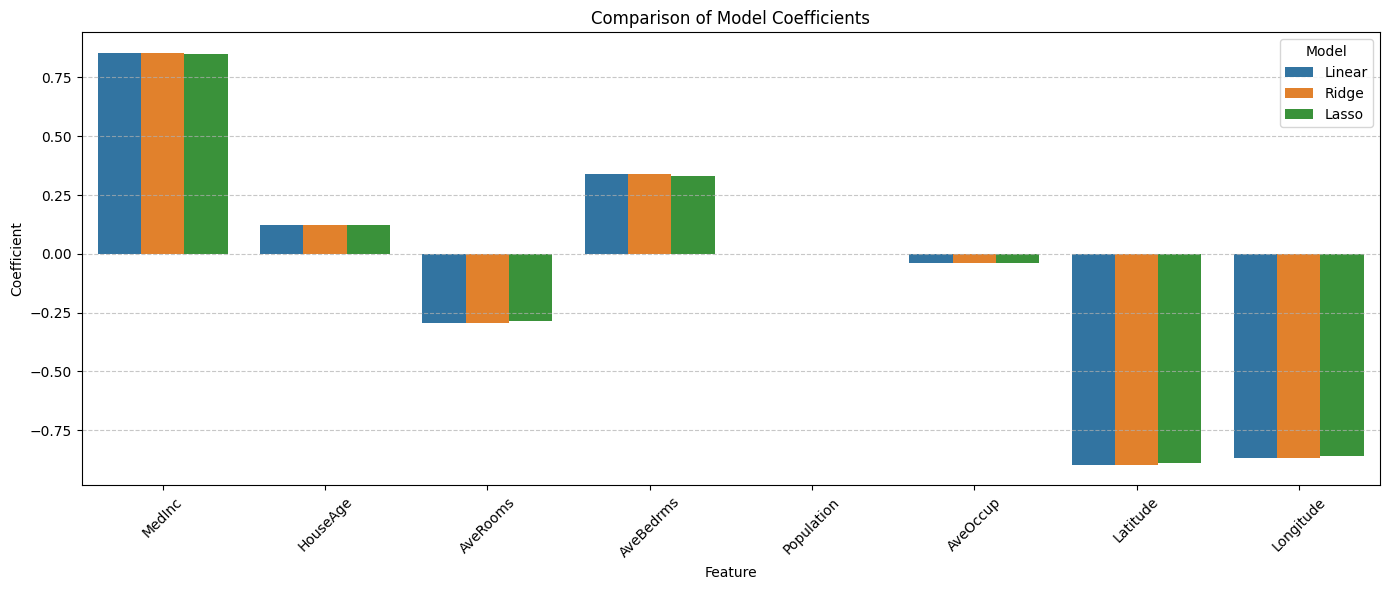

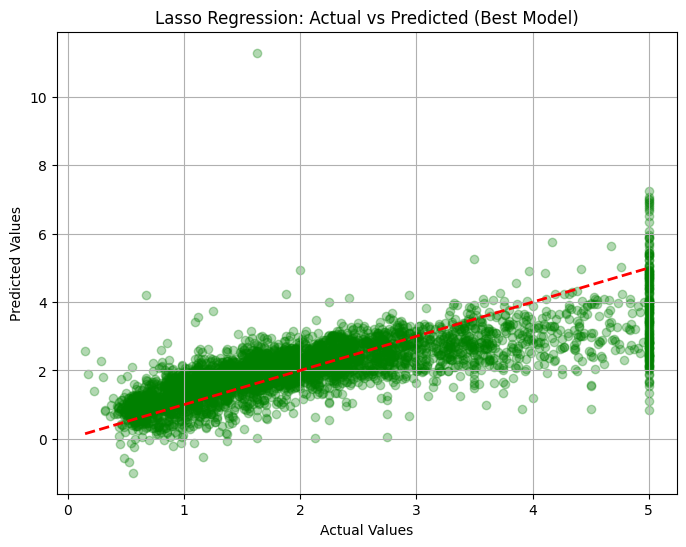

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Consolidate performance metrics into a DataFrame
metrics_data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'MSE': [mse_lr, mse_ridge, mse_lasso],
    'R2 Score': [r2_lr, r2_ridge, r2_lasso]
}
metrics_df = pd.DataFrame(metrics_data)
print('Model Performance Comparison:')
display(metrics_df)

# 2. Visualize coefficients
coef_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Linear': lr_model.coef_,
    'Ridge': ridge_cv.coef_,
    'Lasso': lasso_cv.coef_
})

coef_melted = coef_df.melt(id_vars='Feature', var_name='Model', value_name='Coefficient')

plt.figure(figsize=(14, 6))
sns.barplot(data=coef_melted, x='Feature', y='Coefficient', hue='Model')
plt.title('Comparison of Model Coefficients')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Scatter plot of Actual vs Predicted for the best model (Lasso)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted (Best Model)')
plt.grid(True)
plt.show()

## Summary:

### Q&A

**Which regression model performed the best on the California Housing dataset?**
The Lasso Regression model was the top performer, though the margin was very narrow. It achieved the lowest Mean Squared Error (MSE) of approximately 0.5549 and the highest R-squared ($R^2$) score of approximately 0.5765.

**What were the optimal hyperparameters found during the analysis?**
Using cross-validation, the optimal regularization strength ($\alpha$) for Ridge Regression was determined to be approximately 0.0886, while the optimal $\alpha$ for Lasso Regression was approximately 0.0007.

**How did regularization affect the model coefficients?**
The analysis showed that both Ridge and Lasso regularization slightly modified the feature weights compared to standard Linear Regression. Lasso, specifically, demonstrated its characteristic feature selection capability by shrinking less impactful coefficients towards zero.

---

### Data Analysis Key Findings

*   **Model Consistency**: All three models (Linear, Ridge, and Lasso) yielded very similar results, with $R^2$ scores hovering around 0.576. This suggests that the relationship between the features and the target variable is largely linear and that the dataset does not suffer from extreme overfitting that would typically be corrected by heavy regularization.
*   **Predictive Performance**:
    *   **Lasso**: MSE $\approx$ 0.5549, $R^2$ $\approx$ 0.5765
    *   **Ridge**: MSE $\approx$ 0.5559, $R^2$ $\approx$ 0.5758
    *   **Linear**: MSE $\approx$ 0.5559, $R^2$ $\approx$ 0.5758
*   **Data Quality**: The California Housing dataset was clean, with zero missing values across all 20,640 samples.
*   **Scaling Necessity**: Standardizing the features was essential for the regularization models to ensure that the penalty term was applied fairly across features with different units, such as "MedInc" (Median Income) and "HouseAge".

---

### Insights or Next Steps

*   **Feature Engineering**: Given that the $R^2$ score is approximately 0.58, the current linear models only explain about 58% of the variance. Exploring non-linear relationships through polynomial features or using more complex algorithms like Gradient Boosting (e.g., XGBoost or LightGBM) might significantly improve predictive accuracy.
*   **Outlier Analysis**: The "Actual vs. Predicted" scatter plot indicated increased variance and potentially capped values at higher price points (e.g., houses valued at 5.0). Investigating these outliers or data clipping could lead to a more robust model.
